In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Save .CSV to df
df = pd.read_csv(r'C:\Users\dre2\Desktop\WGU\D212\Task1\medical_clean.csv')
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [3]:
#Check for nulls or missing values
nulls = df.isnull().any()
print(nulls)

CaseOrder             False
Customer_id           False
Interaction           False
UID                   False
City                  False
State                 False
County                False
Zip                   False
Lat                   False
Lng                   False
Population            False
Area                  False
TimeZone              False
Job                   False
Children              False
Age                   False
Income                False
Marital               False
Gender                False
ReAdmis               False
VitD_levels           False
Doc_visits            False
Full_meals_eaten      False
vitD_supp             False
Soft_drink            False
Initial_admin         False
HighBlood             False
Stroke                False
Complication_risk     False
Overweight            False
Arthritis             False
Diabetes              False
Hyperlipidemia        False
BackPain              False
Anxiety               False
Allergic_rhinitis   

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [5]:
#Drop columns that aren't being used in analysis

df = df[['Initial_days', 'TotalCharge', 'Doc_visits', 'Full_meals_eaten', 'ReAdmis']]
df.head()


,Initial_days,TotalCharge,Doc_visits,Full_meals_eaten,ReAdmis
0,10.585770,3726.702860,6,0,No
1,15.129562,4193.190458,4,2,No
2,4.772177,2434.234222,4,1,No
3,1.714879,2127.830423,4,1,No
4,1.254807,2113.073274,5,0,No


Text(0, 0.5, 'ReAdmis')

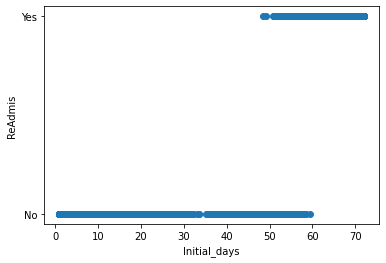

In [6]:
#Visualize the data to gain some understanding before running Kmeans
plt.scatter(df.Initial_days, df['ReAdmis'])
plt.xlabel('Initial_days')
plt.ylabel('ReAdmis')

In [ ]:
#Visualize the data to gain some understanding before running Kmeans
plt.scatter(df.Initial_days, df['ReAdmis'])
plt.xlabel('Initial_days')
plt.ylabel('ReAdmis')

In [22]:
df.describe()

,Initial_days,TotalCharge,Doc_visits,Full_meals_eaten,cluster
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,34.455299,5312.172769,5.012200,1.001400,0.49770
std,26.309341,2180.393838,1.045734,1.008117,0.50002
min,1.001981,1938.312067,1.000000,0.000000,0.00000
25%,7.896215,3179.374015,4.000000,0.000000,0.00000
50%,35.836244,5213.952000,5.000000,1.000000,0.00000
75%,61.161020,7459.699750,6.000000,2.000000,1.00000
max,71.981490,9180.728000,9.000000,7.000000,1.00000


Text(0, 0.5, 'TotalCharge')

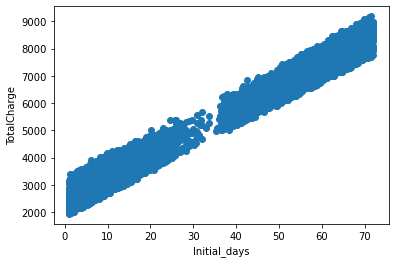

In [7]:
#Visualize the data to gain some understanding before running Kmeans
plt.scatter(df.Initial_days, df['TotalCharge'])
plt.xlabel('Initial_days')
plt.ylabel('TotalCharge')

In [8]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['Initial_days', 'TotalCharge']])
y_predicted

array([0, 0, 0, ..., 1, 1, 1])

In [9]:
df['cluster']=y_predicted
df.head()

,Initial_days,TotalCharge,Doc_visits,Full_meals_eaten,ReAdmis,cluster
0,10.585770,3726.702860,6,0,No,0
1,15.129562,4193.190458,4,2,No,0
2,4.772177,2434.234222,4,1,No,0
3,1.714879,2127.830423,4,1,No,0
4,1.254807,2113.073274,5,0,No,0


In [10]:
km.cluster_centers_

array([[   9.0408056 , 3228.3333363 ],
       [  64.83962561, 7877.7108227 ],
       [  50.50478958, 6508.34676509]])

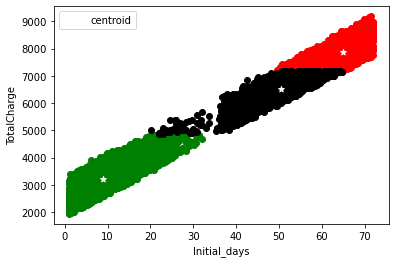

In [11]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Initial_days, df1['TotalCharge'], color= 'green')
plt.scatter(df2.Initial_days, df2['TotalCharge'], color= 'red')
plt.scatter(df3.Initial_days, df3['TotalCharge'], color= 'black')

#Show the cluster centroid with a purple star
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='white',marker='*',label='centroid')
plt.xlabel('Initial_days')
plt.ylabel('TotalCharge')
plt.legend()

In [12]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['Initial_days', 'TotalCharge']])
y_predicted

array([1, 1, 1, ..., 0, 0, 0])

In [13]:
df['cluster']=y_predicted
df.head()

,Initial_days,TotalCharge,Doc_visits,Full_meals_eaten,ReAdmis,cluster
0,10.585770,3726.702860,6,0,No,1
1,15.129562,4193.190458,4,2,No,1
2,4.772177,2434.234222,4,1,No,1
3,1.714879,2127.830423,4,1,No,1
4,1.254807,2113.073274,5,0,No,1


In [14]:
#Show cluster centers
km.cluster_centers_

array([[  64.81581542, 7874.84776884],
       [   9.03734945, 3228.0033401 ],
       [  50.43388212, 6502.88747328]])

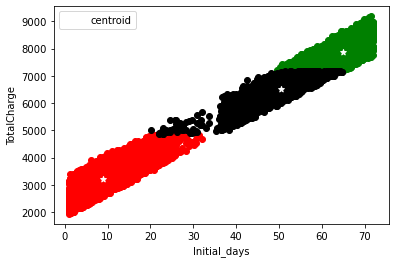

In [15]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Initial_days, df1['TotalCharge'], color= 'green')
plt.scatter(df2.Initial_days, df2['TotalCharge'], color= 'red')
plt.scatter(df3.Initial_days, df3['TotalCharge'], color= 'black')

#Show the cluster centroid with a purple star
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='white',marker='*',label='centroid')
plt.xlabel('Initial_days')
plt.ylabel('TotalCharge')
plt.legend()

In [16]:
sse = []

#loop thru until we get 9 values of sse, the print sse array
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Initial_days','TotalCharge']])
    sse.append(km.inertia_)
sse

[47543339884.57249,
 4871085629.671668,
 2752775026.7965994,
 1598153948.105983,
 1108509547.754066,
 820086298.9884799,
 608818135.3165376,
 476589337.9605567,
 381617977.3395391]

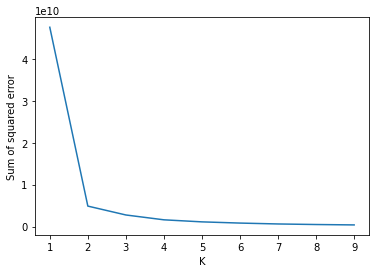

In [17]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [18]:
#Elbow plot clearly shows k = 2 as elbow, show new scatter plot based on k=2
km = KMeans(n_clusters = 2)
y_predicted = km.fit_predict(df[['Initial_days', 'TotalCharge']])
y_predicted

array([0, 0, 0, ..., 1, 1, 1])

In [19]:
df['cluster']=y_predicted
df.head()

,Initial_days,TotalCharge,Doc_visits,Full_meals_eaten,ReAdmis,cluster
0,10.585770,3726.702860,6,0,No,0
1,15.129562,4193.190458,4,2,No,0
2,4.772177,2434.234222,4,1,No,0
3,1.714879,2127.830423,4,1,No,0
4,1.254807,2113.073274,5,0,No,0


In [20]:
#Show cluster centers
km.cluster_centers_

array([[   9.37681862, 3256.07992467],
       [  59.76556816, 7387.26908295]])

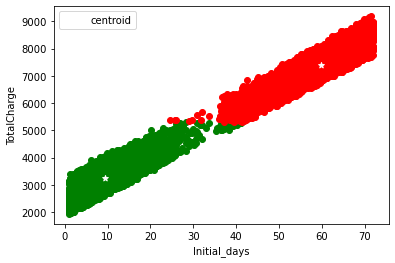

In [21]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Initial_days, df1['TotalCharge'], color= 'green')
plt.scatter(df2.Initial_days, df2['TotalCharge'], color= 'red')
plt.scatter(df3.Initial_days, df3['TotalCharge'], color= 'black')

#Show the cluster centroid with a purple star
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='white',marker='*',label='centroid')
plt.xlabel('Initial_days')
plt.ylabel('TotalCharge')
plt.legend()

In [ ]:
df.to_csv(r'C:\Users\dre2\Desktop\WGU\D212\Task1\medical_cluster.csv')